# Examples of MOPs assembly using OGM
This Jupyter notebook provide examples on how to use the OGM-based algorithm to construct MOPs xyz given CBUs and AM.

Available AMs in the OntoMOPs knowledge graph:
| Assembly Model                    | IRI                                                                                             |
|-----------------------------------|-------------------------------------------------------------------------------------------------|
| (3-pyramidal)x2(2-bent)x3_D3h     | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_4f695309-35ef-4b72-ac47-25d46d8e87cd> |
| (3-planar)x4(3-pyramidal)x4_Td    | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_793984ba-26f8-4770-aca3-e94b07f632f4> |
| (4-pyramidal)x3(2-bent)x6_D3h     | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_2fb6e7fe-95d1-400e-a9da-b6ce614935a8> |
| (3-pyramidal)x4(2-linear)x6_Td    | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_3d71c19a-ab54-4993-8c94-267dcfe41792> |
| (3-planar)x4(2-bent)x6_Td         | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_88a0302e-9b44-44ba-83bb-848315ec26d8> |
| (4-pyramidal)x6(3-planar)x8_Oh    | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_038c423f-c7f7-48c7-8701-6441b597e6cd> |
| (4-pyramidal)x6(3-pyramidal)x8_Oh | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_b3922a4e-a7d0-4115-8113-64759855625e> |
| (4-planar)x6(3-pyramidal)x8_Oh    | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_ae4c5d0c-f226-4567-8363-4af3e53da40e> |
| (4-planar)x6(2-bent)x12_Oh        | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_52659f58-8e11-458e-aee9-766940004a7e> |
| (4-pyramidal)x6(2-bent)x12_D3h    | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_fd68c08d-8f7f-4ac9-8469-3f017c38066a> |
| (4-pyramidal)x6(2-linear)x12_Oh   | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_6289a7a7-62f9-49a7-a6da-4e074b99a328> |
| (3-pyramidal)x8(2-bent)x12_Th     | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_f738bfdb-8f73-4321-9888-bb26ebad977c> |
| (3-planar)x8(2-bent)x12_Oh        | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_ce490f69-fcc0-40f6-a1ac-75b8312202fa> |
| (3-pyramidal)x8(2-bent)x12_Cs     | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_a4a091c4-a2c3-4320-9405-8e22836cd65b> |
| (5-pyramidal)x12(3-planar)x20_Ih  | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_f664df33-ef4a-44f8-a76f-930234465ea5> |
| (4-planar)x12(2-bent)x24_Oh       | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_9d9ab0eb-cec0-4dd3-aaa0-0e16d8b154f0> |
| (4-planar)x12(2-bent)x24_D3h      | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_3a3bccc5-4834-4aaf-963e-0d89df7a5242> |
| (5-pyramidal)x12(2-linear)x30_Ih  | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_4d34c0b4-2a4b-4f16-98dd-97c5ce7349a5> |
| (4-pyramidal)x4(2-bent)x8_D4h     | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_35076129-4856-4f04-a535-58e41810b4d2> |
| (4-planar)x6(3-pyramidal)x8_Th    | <https://www.theworldavatar.com/kg/ontomops/AssemblyModel_03f32815-d43d-4fc4-94da-4157573cc668> |


## Setup knowledge graph connection

In [1]:
# Import the necessary twa modules
from twa.kg_operations import PySparqlClient
from twa.conf import config_generic, Config

# Import the MOPs module
import ontomops

Info: Initializing JPSGateway with resName=JpsBaseLib, jarPath=None


In [2]:
# Define the environment variables
class MOPsConfig(Config):
    SPARQL_ENDPOINT: str
    SPARQL_USERNAME: str
    SPARQL_PASSWORD: str
    FS_URL: str
    FS_USERNAME: str
    FS_PASSWORD: str
    DATA_DIR: str

> **NOTE: remember to populate `./mops.env` to the knowledge graph endpoints**
> 
> Please ask the maintainer of the repo if you would like to gain access

In [3]:
# Retrieve the configuration parameters
env_file = './mops.env'
mops_conf = config_generic(MOPsConfig, env_file=env_file)

In [4]:
# Specify the knowledge graph client
sparql_client = PySparqlClient(
    query_endpoint = mops_conf.SPARQL_ENDPOINT,
    update_endpoint = mops_conf.SPARQL_ENDPOINT,
    kg_user = mops_conf.SPARQL_USERNAME,
    kg_password = mops_conf.SPARQL_PASSWORD,
    fs_url = mops_conf.FS_URL,
    fs_user = mops_conf.FS_USERNAME,
    fs_pwd = mops_conf.FS_PASSWORD,
)

## Assemble MOP using existing CBUs

For example, we would like to construct a MOP with the following chemical building units: `[Zr3O(OH)3(C5H5)3]` and `[(C6H3)(CO2)`, following the assembly model `(3-planar)x4(3-pyramidal)x4_Td`.

In [5]:
# Define the MOPs to be constructed
data = {
    'cbu1_iri': 'https://www.theworldavatar.com/kg/ontomops/ChemicalBuildingUnit_3d71c19a-ab54-4993-8c94-267dcfe41792_0', # [Zr3O(OH)3(C5H5)3]
    'cbu2_iri': 'https://www.theworldavatar.com/kg/ontomops/ChemicalBuildingUnit_f664df33-ef4a-44f8-a76f-930234465ea5_1', # [(C6H3)(CO2)3]
    'am_iri': 'https://www.theworldavatar.com/kg/ontomops/AssemblyModel_793984ba-26f8-4770-aca3-e94b07f632f4', # (3-planar)x4(3-pyramidal)x4_Td
}

In [6]:
# Pull the CBUs and AM from the KG - this might take one minute if the KG is large
cbus = ontomops.ChemicalBuildingUnit.pull_from_kg(
    [data['cbu1_iri'], data['cbu2_iri']],
    sparql_client,
    -1, # -1 means full recursion
)
am = ontomops.AssemblyModel.pull_from_kg(
    [data['am_iri']],
    sparql_client,
    -1
)[0] # The query returns a list, but we know there is only one AM

In [7]:
# Define the provenance information
prov = ontomops.Provenance(hasReferenceDOI='Placeholder DOI for TWA OGM')

In [8]:
# Assemble the MOP
new_mop = ontomops.MetalOrganicPolyhedron.from_assemble(am, cbus, prov, sparql_client=sparql_client, data_dir=mops_conf.DATA_DIR)

In [9]:
# Check the file path of the assembled XYZ file
xyz_fpath = list(list(new_mop.hasGeometry)[0].hasGeometryFile)[0]
xyz_fpath

'./data/xyz_mops_new/(3-pyramidal)x4(3-planar)x4_Td___[Zr3O(OH)3(C5H5)3]4[(C6H3)(CO2)3]4___MetalOrganicPolyhedron_0357dfce-dbc5-4658-a080-65db0d56b7ff.xyz'

/home/jb2197/anaconda3/envs/twa/lib/python3.10/site-packages/plotly/express/_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



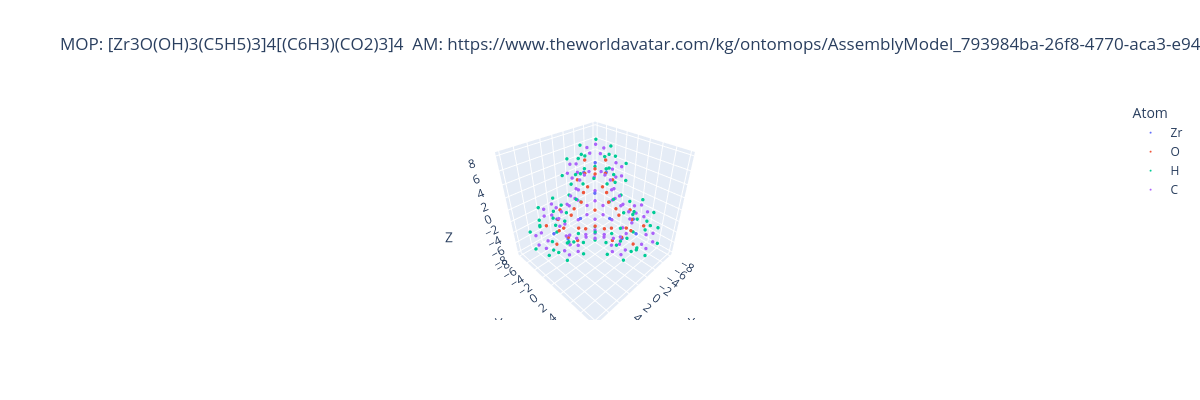

In [ ]:
# The visualisation is implemented using plotly - https://github.com/plotly/plotly.py/issues/931#issuecomment-2098209279
import plotly.io as pio
pio.renderers.default = "jupyterlab+png"
fig = new_mop.visualise()